/home/htp25/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/htp25/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/htp25/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/htp25/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

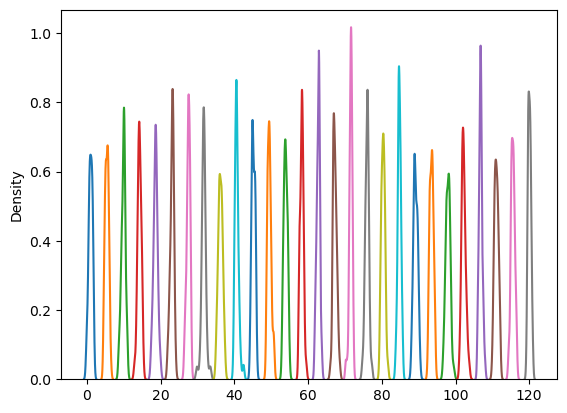

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.normal(2800, 22, 40)

means = np.linspace(start=1, stop=120, num=28)

peakx = []
peaky = []

for i, mean in enumerate(means):
    mu, sigma = mean, 0.5
    data = np.random.normal(mu, sigma, 40)
    ax = sns.kdeplot(data, fill=False)
    x, y = ax.get_lines()[i].get_data()
    peakx.append(x)
    peaky.append(y)


peaky[0] = np.array(peaky[0])/10
peakx[0] = np.array(peakx[0])+0.5

peaky[5] = np.array(peaky[5])/6
peakx[5] = np.array(peakx[5])+0.1

peakx[7] = np.array(peakx[7])+0.2
peakx[12] = np.array(peakx[12])+0.5

peaky[1] = np.array(peaky[1])/8
peaky[7] = np.array(peaky[7])/3
peaky[11] = np.array(peaky[12])/1.5
peaky[12] = np.array(peaky[12])/2
peaky[15] = np.array(peaky[15])/5

peaky[18] = np.array(peaky[18])/7
peakx[18] = np.array(peakx[18])+0.6




listx = [x for xs in peakx for x in xs]
listy = [x for xs in peaky for x in xs]

arrx = np.array(listx)
arry = np.array(listy)



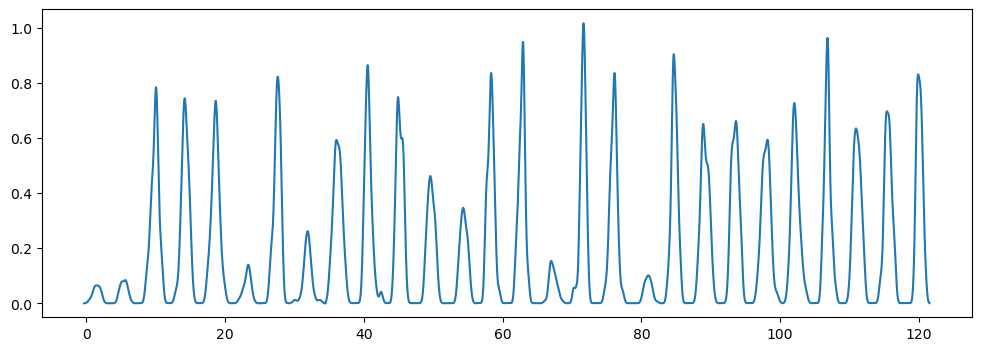

In [2]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(arrx, arry)

x1, y1 = ax.lines[0].get_data()



#fig.savefig('temp.png', transparent=True)

5600


/home/htp25/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


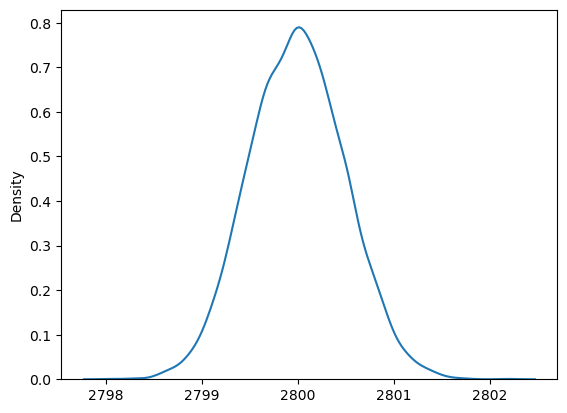

In [3]:



data5 = np.random.normal(2800, 0.5, 5600)
ax5 = sns.kdeplot(data5, fill=False)
x5, y5 = ax.get_lines()[0].get_data()

print(len(y5))

5600


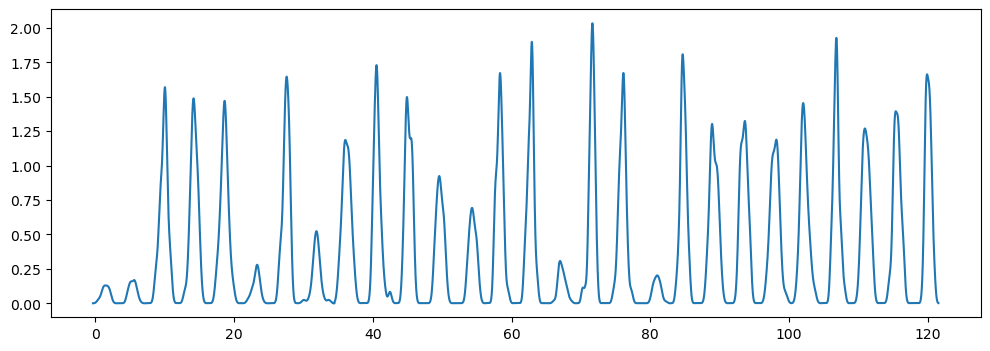

In [4]:
y5 = y5
y6 = y1+y5
print(len(y6))

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(arrx, y6)

#x1, y1 = ax.lines[0].get_data()


['SPECTRUM', '-', 'MS']
['FB_SA_BioIDJan24_C1_1.raw']
['FTMS', '+', 'p', 'NSI', 'Full', 'ms', '[400.0000-1500.0000]']
['Scan', '#:', '1']
['RT:', '0.00']
['m/zIntensityRelative']
['']
['', '', '419.31711', '114648.6', '', '', '50.32']
['', '', '420.32047', '', '28471.5', '', '', '12.50']
['', '', '428.89288', '', '14517.0', '', '', '', '6.37']
['', '', '430.88992', '', '35190.7', '', '', '15.44']
['', '', '432.88708', '', '26761.1', '', '', '11.75']
['', '', '445.12173', '227848.9', '', '100.00']
['', '', '446.12198', '', '85935.1', '', '', '37.72']
['', '', '447.11792', '', '52258.3', '', '', '22.94']
['', '', '447.34857', '102585.3', '', '', '45.02']
['', '', '448.35193', '', '32440.0', '', '', '14.24']
['', '', '519.14099', '119184.6', '', '', '52.31']
['', '', '520.14136', '', '53950.6', '', '', '23.68']
['', '', '521.13800', '', '34045.0', '', '', '14.94']
['', '', '533.19305', '', '26859.8', '', '', '11.79']
['', '', '593.15979', '', '49320.4', '', '', '21.65']
['', '', '594.1602

<BarContainer object of 20 artists>

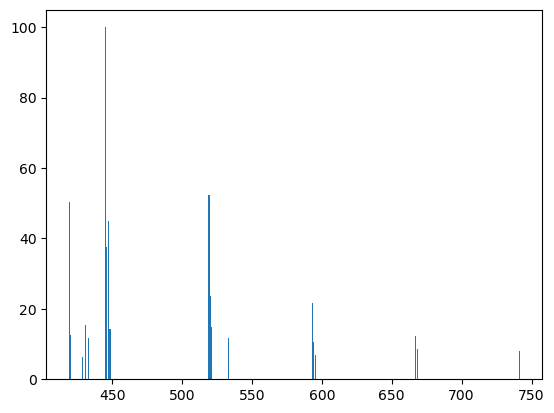

In [5]:
mz = []
relint = []

with open('tesdata2.txt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('\n', '').replace('\t', '').split(' ')
        print(line)
        if len(line) > 3 and line[1] == '':
            mz.append(float(line[2]))
            relint.append(float(line[-1]))
        
plt.bar(mz, relint)
        

In [19]:
store = []

with open('skyline_testdata.txt') as f:
    counter = 0
    lines = f.readlines()
    lines = [line.rstrip() for line in lines]
    counter = 0
    packet = []
    
    startpoints = []
    for i, line in enumerate(lines):
        if 'Retention' in line:
            startpoints.append(i)
            
    section = []
    for i, start in enumerate(startpoints[:-1]):
        
        pepindex = [start, startpoints[i+1]-1]
        n = pepindex[0]
        
        while n < pepindex[1]:
            
            section.append(lines[n])
            n+=1
            
            if n == pepindex[1]:
                store.append(section)
                section = []

peptime = []
pepinten = []
for spectrum in store:
    time = []
    inten = []
    spectrum = spectrum[1:-1]
    for line in spectrum:
        line = line.split('\t')
        time.append(float(line[0]))
        inten.append(float(line[1]))
    peptime.append(np.array(time))
    pepinten.append(np.array(inten))
    
print(np.argmin(pepinten[3]))
print(pepinten[3][719])
pepinten[3][716] = pepinten[3][716]/100
pepinten[3][717] = pepinten[3][717]/100
pepinten[3][718] = pepinten[3][718]/100
pepinten[3][719] = pepinten[3][719]/100

pepinten0_3 = pepinten[0]*2
pepinten8_3 = pepinten[8]/4
pepinten3_3 = pepinten[3]*1.5

addon1 = pepinten0_3[1851:]
addon2 = pepinten0_3[1638:]
pepinten3_3 = np.concatenate((pepinten3_3, addon1))
pepinten8_3 = np.concatenate((pepinten8_3, addon2))



pepinten0_1 = pepinten0_3/2
pepinten0_2 = pepinten0_3/1.5

pepinten8_1 = pepinten8_3/2
pepinten8_2 = pepinten8_3/1.5

pepinten3_1 = pepinten3_3/2
pepinten3_2 = pepinten3_3/1.5

#plt.plot(peptime[0], pepinten0_1)
#plt.plot(peptime[3], pepinten3_1)
#plt.plot(peptime[8], pepinten8_1)
    
print(len(pepinten8_3))
print(len(pepinten3_1))



719
-20483612.0
2150
2150


/tmp/ipykernel_445212/397955242.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xls[::-1], fontsize=6)
/tmp/ipykernel_445212/397955242.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(zls, fontsize=6)


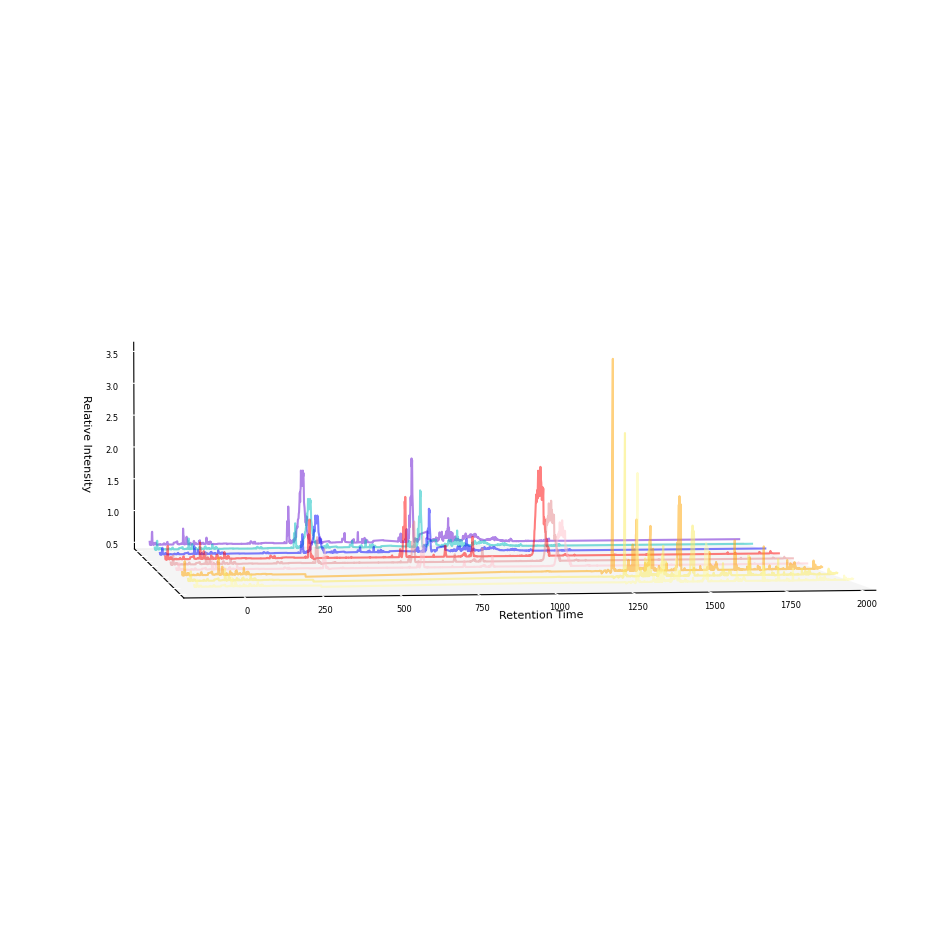

In [61]:
#from mpl_toolkits.mplot3d.axes3d import Axes3D
#from mpl_toolkits.mplot3d import proj3d
#import matplotlib as mpl


fig = plt.figure(figsize = (12, 12))

ax = fig.add_subplot(projection='3d')
N = 3  # some number > 1 that stretches z axis as you desire
ax.set_box_aspect((N, 3, 1))  # xy aspect ratio is 1:1, but stretches z axis

xls = ['0', '250', '500', '750', '1000', '1250', '1500', '1750', '2000']
zls = ['0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5']


colors = ['#620bd0', 'c', 'b', 'r', '#e48588', 'pink', 'orange', '#FBEC5D', '#FFFAA0']
yticks = [0,1,2,3,4,5,6,7,8]
data = [pepinten0_3, pepinten0_2, pepinten0_1, 
        pepinten8_3, pepinten8_2, pepinten8_1, 
        pepinten3_3, pepinten3_2, pepinten3_1]

for c, k, d in zip(colors, yticks, data):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(len(d))
    ys = d

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.plot(xs, ys, zs=k, zdir='y', color=c, alpha=0.5)

ax.set_xlabel('Retention Time', fontsize=8)
ax.set_ylabel('')
ax.set_zlabel('Relative Intensity', fontsize=8)

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

ax.set_yticklabels([], fontsize=6)
ax.set_xticklabels(xls[::-1], fontsize=6)
ax.set_zticklabels(zls, fontsize=6)

ax.tick_params(color='w',length=0, width=0)


ax.grid(False)
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.view_init(3, 82) 
ax.margins(x=0)


fig.savefig('testy.png', transparent=True)



plt.show()


In [ ]:
    ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))